In [1]:
import numpy as np
import astropy.io.fits as pf
import piff
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table, hstack
%matplotlib inline

In [4]:
y3_cat = pf.open('./psf_y3a1-v29.fits')[1].data

gaia1 = pf.open('./gaia_000001.fits')[1].data
gaia2 = pf.open('./gaia_000002.fits')[1].data
gaia3 = pf.open('./gaia_000002.fits')[1].data

In [39]:
print(y3_cat.columns)

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'obs_e1'; format = 'D'
    name = 'obs_e2'; format = 'D'
    name = 'obs_T'; format = 'D'
    name = 'piff_e1'; format = 'D'
    name = 'piff_e2'; format = 'D'
    name = 'piff_T'; format = 'D'
    name = 'mag'; format = 'D'
    name = 'fov_x'; format = 'D'
    name = 'fov_y'; format = 'D'
    name = 'exp'; format = 'J'
    name = 'ccd'; format = 'I'
    name = 'band'; format = '1A'
    name = 'tiling'; format = 'I'
)


In [5]:
print(np.unique(y3_cat['exp']))

[226650 226651 226652 ... 516834 516835 516836]


In [26]:
exposure_num = 226650
mask = (y3_cat['exp'] == exposure_num)
cat_single_exp = y3_cat[mask]
print(len(cat_single_exp))

6483


In [15]:
gaia1_coord = SkyCoord(gaia1['RA']*u.deg, gaia1['DEC']*u.deg)
gaia2_coord = SkyCoord(gaia2['RA']*u.deg, gaia2['DEC']*u.deg)
gaia3_coord = SkyCoord(gaia3['RA']*u.deg, gaia3['DEC']*u.deg)

des_coord = SkyCoord(cat_single_exp['ra']*u.deg, cat_single_exp['dec']*u.deg)

In [22]:
matches1 = []
matches2 = []
matches3 = []

des_indices = []
idx_des, idx_gaia, d2d, d3d = SkyCoord.search_around_sky(gaia1_coord, des_coord, .0003*u.deg)
idx_des2, idx_gaia2, d2d2, d3d2 = SkyCoord.search_around_sky(gaia2_coord, des_coord, .0003*u.deg)
idx_des3, idx_gaia3, d2d3, d3d3 = SkyCoord.search_around_sky(gaia3_coord, des_coord, .0003*u.deg)
des_indices.extend(idx_des)
des_indices.extend(idx_des2)
des_indices.extend(idx_des3)
des_sliced = cat_single_exp[des_indices]

matches1.extend(idx_gaia)
matches2.extend(idx_gaia2)
matches3.extend(idx_gaia3)

In [23]:
print(np.unique(cat_single_exp['ccd']))

[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 62]


In [27]:
for i in [x for x in range(1, 63) if (x != 2 and x!= 31) and x!= 61]:
    per_chip = des_sliced[des_sliced['ccd']==i]
    new_hdu = pf.BinTableHDU.from_columns(per_chip._get_raw_data())
    new_hdu.writeto('./Y3_gaiamatch_DECam_'+str(exposure_num)+'_'+str(i)+'.fits')

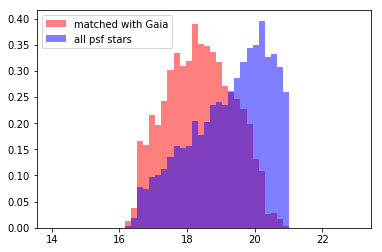

In [32]:
plt.figure()
plt.hist(des_sliced['mag'], bins = 50, color = 'r', alpha=0.5, range=(14, 23), normed=True, label='matched with Gaia')
plt.hist(cat_single_exp['mag'], bins = 50, color = 'b', alpha=0.5, range=(14, 23), normed=True, label='all psf stars')
plt.legend()
plt.show()

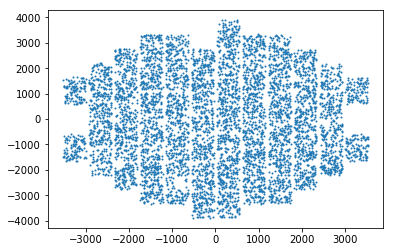

In [34]:
plt.figure()
plt.scatter(cat_single_exp['fov_x'], cat_single_exp['fov_y'], s=1)
plt.show()